In [161]:
%matplotlib notebook

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [163]:
dc_data_df= pd.read_csv('../Project_1/dc-wikia-data_csv.csv')

In [164]:
marvel_data_df = pd.read_csv('../Project_1/marvel-wikia-data_csv.csv')

In [165]:
combined_hero_data = pd.merge(dc_data_df, marvel_data_df, how="outer")

In [166]:
combined_hero_data

,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first appearance,year
0,1422,batman (bruce wayne),\/wiki\/batman_(bruce_wayne),secret identity,good characters,blue eyes,black hair,male characters,straight,living characters,3093.0,"1939, may",1939.0
1,23387,superman (clark kent),\/wiki\/superman_(clark_kent),secret identity,good characters,blue eyes,black hair,male characters,straight,living characters,2496.0,"1986, october",1986.0
2,1458,green lantern (hal jordan),\/wiki\/green_lantern_(hal_jordan),secret identity,good characters,brown eyes,brown hair,male characters,straight,living characters,1565.0,"1959, october",1959.0
3,1659,james gordon (new earth),\/wiki\/james_gordon_(new_earth),public identity,good characters,brown eyes,white hair,male characters,straight,living characters,1316.0,"1987, february",1987.0
4,1576,richard grayson (new earth),\/wiki\/richard_grayson_(new_earth),secret identity,good characters,blue eyes,black hair,male characters,straight,living characters,1237.0,"1940, april",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23267,657508,ru'ach (earth-616),\/ru%27ach_(earth-616),no dual identity,bad characters,green eyes,no hair,male characters,straight,living characters,NaN,NaN,NaN
23268,665474,thane (thanos' son) (earth-616),\/thane_(thanos%27_son)_(earth-616),no dual identity,good characters,blue eyes,bald,male characters,straight,living characters,NaN,NaN,NaN
23269,695217,tinkerer (skrull) (earth-616),\/tinkerer_(skrull)_(earth-616),secret identity,bad characters,black eyes,bald,male characters,straight,living characters,NaN,NaN,NaN
23270,708811,tk421 (spiderling) (earth-616),\/tk421_(spiderling)_(earth-616),secret identity,neutral characters,NaN,bald,male characters,straight,living characters,NaN,NaN,NaN


In [167]:
#How many characters in DC universe?
len(dc_data_df)

6896

In [168]:
#How many characters in Marvel universe?
len(marvel_data_df)

16376

In [169]:
#How many characters in each universe?
len(combined_hero_data)

23272

In [170]:
#Gender in DC Universe
dc_gender_df = pd.read_csv('../Project_1/dc-wikia-data_csv.csv')
dc_gender = dc_gender_df['sex']

In [171]:
dc_gender

0         male characters
1         male characters
2         male characters
3         male characters
4         male characters
              ...        
6891    female characters
6892      male characters
6893      male characters
6894      male characters
6895      male characters
Name: sex, Length: 6896, dtype: object

In [172]:
#Count the number of male, female, genderless, and transgender characters in DC Universe
dc_gender_count = dc_gender_df.groupby('sex')

dc_genders = dc_gender_count['sex'].count()

dc_genders

sex
female characters         1967
genderless characters       20
male characters           4783
transgender characters       1
Name: sex, dtype: int64

<IPython.core.display.Javascript object>


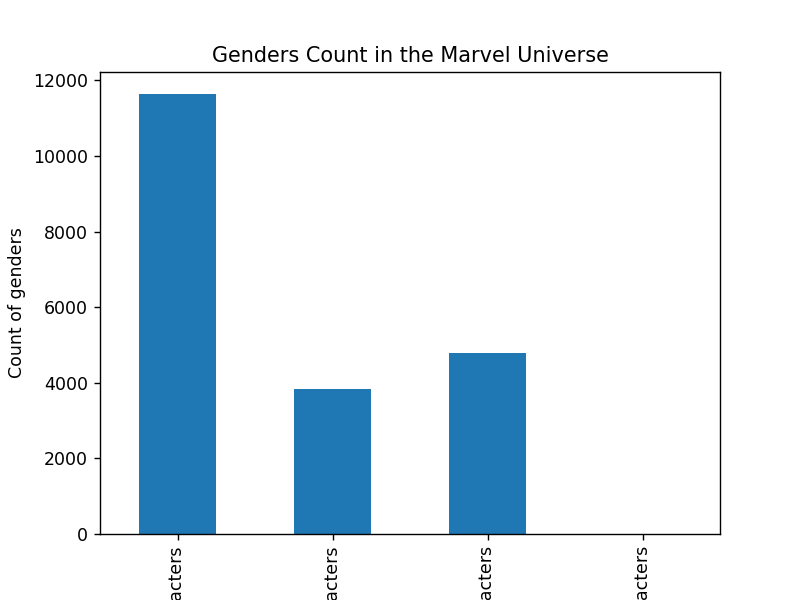

Text(0.5, 1.0, 'Genders Count in the DC Universe')

In [173]:
#Chart showing breakdown of genders in DC Universe
dc_gender_count = dc_gender_count['sex'].value_counts()

bar_plot = dc_gender_count.plot.bar(color='tab:blue') 

plt.xlabel("Genders")
plt.ylabel("Count of genders")


plt.title("Genders Count in the DC Universe")

In [174]:
marvel_gender_df = pd.read_csv('../Project_1/marvel-wikia-data_csv.csv')
marvel_gender = marvel_gender_df['sex']

In [175]:
marvel_gender

0        male characters
1        male characters
2        male characters
3        male characters
4        male characters
              ...       
16371    male characters
16372    male characters
16373    male characters
16374    male characters
16375                NaN
Name: sex, Length: 16376, dtype: object

In [176]:
marvel_gender_df['sex'].value_counts()

male characters           11638
female characters          3837
agender characters           45
genderfluid characters        2
Name: sex, dtype: int64

In [177]:
marvel_gender_count = marvel_gender_df['sex'].value_counts()


plt.xlabel("Genders")
plt.ylabel("Count of genders")

plt.title("Genders Count in the Marvel Universe")

bar_plot = marvel_gender_count.plot.bar()

<IPython.core.display.Javascript object>


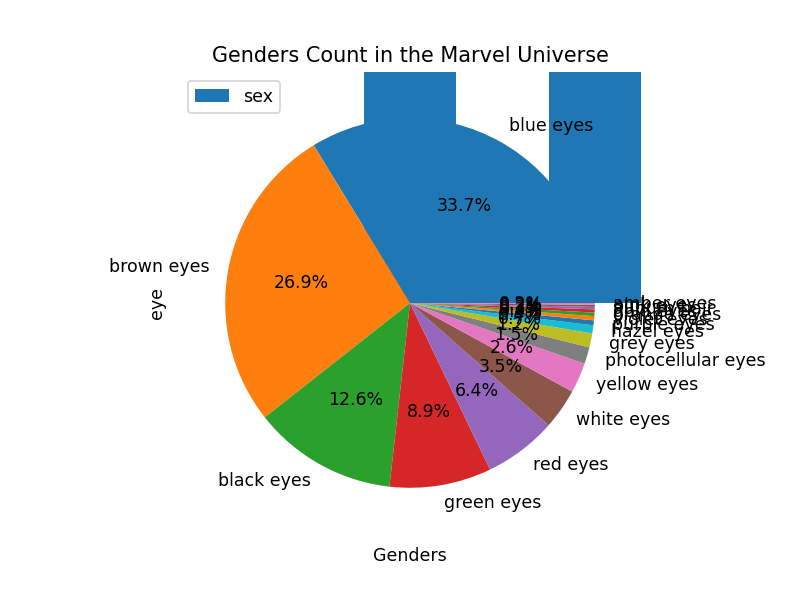

Text(0.5, 1.0, 'Genders Count in the Marvel Universe')

In [178]:
#Chart showing breakdown of genders in Marvel Universe
marvel_gender_count.to_frame().plot.bar()

marvel_gender_count = marvel_gender_df['sex'].value_counts()


plt.xlabel("Genders")
plt.ylabel("Count of genders")

plt.title("Genders Count in the Marvel Universe")

In [179]:
dc_eye_df = pd.read_csv('../Project_1/dc-wikia-data_csv.csv')
dc_eye = dc_eye_df['eye']

In [180]:
#Display breakdown of eye color in DC Universe
dc_eye_df['eye'].value_counts()

blue eyes             1102
brown eyes             879
black eyes             412
green eyes             291
red eyes               208
white eyes             116
yellow eyes             86
photocellular eyes      48
grey eyes               40
hazel eyes              23
purple eyes             14
violet eyes             12
orange eyes             10
gold eyes                9
auburn hair              7
pink eyes                6
amber eyes               5
Name: eye, dtype: int64

In [181]:
eyes = ["Blue Eyes", "Brown Eyes", "Black Eyes", "Green Eyes", "Red Eyes", "White Eyes", "Yellow Eyes", 
          "Photocellular Eyes", "Grey Eyes", "Hazel Eyes", "Purple Eyes", "Violet Eyes", "Orange Eyes", "Gold Eyes", 
          "Auburn Eyes","Pink Eyes","Amber Eyes"]

# The values of each section of the pie chart
sizes = [1102, 879, 412, 291, 208, 116, 86, 48, 40, 23, 14, 12, 10, 9, 7, 6, 5]

# The colors of each section of the pie chart
colors = ["Blue", "Brown", "Black", "Green", "Red", "White", "Yellow", 
          "White", "Grey", "lightcoral", "Purple", "Violet", "Orange", "Gold", 
          "lightskyblue","Pink","crimson"]

# Tells matplotlib to separate the "Eyes" section from the others
explode = (0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [182]:
#Pie Chart showing breakdown of genders in Mark Universe
dc_eye_pie = dc_eye_df["eye"].value_counts()
dc_eye_pie.plot.pie(autopct = "%1.1f%%")
plt.show()

In [197]:
labels = ["Blue Eyes", "Brown Eyes", "Black Eyes", "Green Eyes", "Red Eyes", "White Eyes", "Yellow Eyes", 
          "Photocellular Eyes", "Grey Eyes", "Hazel Eyes", "Purple Eyes", "Violet Eyes", "Orange Eyes", "Gold Eyes", 
          "Auburn Eyes","Pink Eyes","Amber Eyes"]
sizes = [1102, 879, 412, 291, 208, 116, 86, 48, 40, 23, 14, 12, 10, 9, 7, 6, 5]
plot = dc_eye.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('eye')
plt.title("Eye Color in DC Universe")
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

In [184]:
marvel_eye_df = pd.read_csv('../Project_1/marvel-wikia-data_csv.csv')
marvel_eye = marvel_eye_df['eye']

In [185]:
#Display breakdown of eye color in Marvel Universe
marvel_eye_df['eye'].value_counts()

blue eyes          1962
brown eyes         1924
green eyes          613
black eyes          555
red eyes            508
white eyes          400
yellow eyes         256
grey eyes            95
hazel eyes           76
variable eyes        49
purple eyes          31
orange eyes          25
pink eyes            21
one eye              21
gold eyes            14
silver eyes          12
violet eyes          11
amber eyes           10
multiple eyes         7
no eyes               7
yellow eyeballs       6
black eyeballs        3
magenta eyes          2
compound eyes         1
Name: eye, dtype: int64

In [186]:
eyes = ["Blue Eyes", "Brown Eyes", "Green Eyes", "Black Eyes", "Red Eyes", "White Eyes", "Yellow Eyes", 
          "Grey Eyes", "Hazel Eyes", "Variable Eyes", "Purple Eyes", "Orange Eyes", "Pink Eyes", 
          "One Eye","Gold Eyes","Silver Eyes", "Violet Eye","Amber Eyes","Multiple Eyes",  
        "No Eyes","Yellow Eyesballs","Black Eyesballs", "Magenta Eye","Compound Eyes"]

# The values of each section of the pie chart
sizes = [1962, 1924, 613, 555, 508, 400, 256, 95, 76, 49, 31, 25, 21, 21, 14, 12, 11, 10, 7, 7, 6, 3, 2, 1]

# The colors of each section of the pie chart
colors = ["Blue", "Brown", "Green", "Black", "Red", "White", "Yellow", 
          "Grey", "lightcoral", "yellowgreen", "Purple", "Orange", "Pink", 
          "beige","Gold","Silver", "Violet","crimson","lightblue",  
        "lightbrow","lightyellow","lightblack", "Magenta","lightgrey"]

# Tells matplotlib to separate the "Eyes" section from the others
explode = (0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [187]:
#Pie Chart showing breakdown of genders in Marvel Universe
plt.title("Eye Colors in Marvel Universe")
plt.pie(sizes, explode=explode, labels=eyes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=25)
plt.axis("equal")

plt.show()

ValueError: Invalid RGBA argument: 'lightbrow'

In [188]:
dc_orientation_df = pd.read_csv('../Project_1/dc-wikia-data_csv.csv')
dc_orientation = dc_orientation_df['gsm']

In [189]:
#Display breakdown of sexual orientation in DC Universe
dc_orientation_df['gsm'].value_counts()

straight                 6832
homosexual characters      54
bisexual characters        10
Name: gsm, dtype: int64

In [190]:
dc_orientation_count = dc_orientation_df.groupby('gsm')

dc_orientation = dc_orientation_count['gsm'].count()

dc_orientation

gsm
bisexual characters        10
homosexual characters      54
straight                 6832
Name: gsm, dtype: int64

In [191]:
dc_orientation_count = dc_orientation_count['gsm'].value_counts()

bar_plot = dc_orientation_count.plot.bar(color='tab:blue') 

plt.xlabel("Genders")
plt.ylabel("Count of genders")


plt.title("Sexual Orientation Count in the DC Universe")

Text(0.5, 1.0, 'Sexual Orientation Count in the DC Universe')

In [192]:
marvel_orientation_df = pd.read_csv('../Project_1/marvel-wikia-data_csv.csv')
marvel_orientation = marvel_orientation_df['gsm']

In [193]:
marvel_orientation_df['gsm'].value_counts()

straight                  16286
homosexual characters        66
bisexual characters          19
transgender characters        2
transvestites                 1
pansexual characters          1
genderfluid characters        1
Name: gsm, dtype: int64

In [194]:
marvel_orientation_count = marvel_orientation_df.groupby('gsm')

marvel_orientation = marvel_orientation_count['gsm'].count()

marvel_orientation

gsm
bisexual characters          19
genderfluid characters        1
homosexual characters        66
pansexual characters          1
straight                  16286
transgender characters        2
transvestites                 1
Name: gsm, dtype: int64

In [195]:
marvel_orientation_count = marvel_orientation_count['gsm'].value_counts()

bar_plot = marvel_orientation_count.plot.bar(color='tab:blue') 

plt.xlabel("Genders")
plt.ylabel("Count of genders")


plt.title("Sexual Orientation Count in the Marvel Universe")

Text(0.5, 1.0, 'Sexual Orientation Count in the Marvel Universe')